# Feature Importance and Permutation Importance

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_log_error
from sklearn import tree
from IPython.display import Image  
from sklearn.inspection import PartialDependenceDisplay
from sklearn.base import is_classifier, is_regressor
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn import tree
from IPython.display import Image  
from numpy import linalg
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from time import time
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
import random
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import xgboost

def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Data sets

In [68]:
adult = pd.read_csv("../../datasets/adult/adult.csv", delimiter=",", skipinitialspace=True)
print("Adult Shape:", adult.shape)
adult.head(5)

Adult Shape: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
adult_small = adult.sample(1000)
print(adult_small.shape)

(1000, 15)


In [100]:
#dataset = adult_small
#y = y.replace(["yes","no"],[1,0])
#X = pd.get_dummies(X)
oe = OrdinalEncoder().set_output(transform="pandas")
adult_encoded = oe.fit_transform(adult)
X = adult_encoded.loc[:,'age':'native-country']
y = adult_encoded.loc[:,'y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

model = DecisionTreeClassifier(max_depth=5)
#model = RandomForestClassifier()
model.fit(X_train, y_train);

y_pred1 = model.predict(X_test)  

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      2482
         1.0       0.76      0.52      0.62       775

    accuracy                           0.85      3257
   macro avg       0.81      0.73      0.76      3257
weighted avg       0.84      0.85      0.84      3257



In [97]:
# Bank Marketing Dataset from
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#bank = pd.read_csv("../../datasets/bank_marketing/bank/bank-full.csv", delimiter = ";")
#bank = pd.read_csv("bank-full.csv", delimiter = ";")
# print first 5 examples
#bank.head(5)

In [98]:
# X = bank.loc[:,'age':'poutcome']
# X["random_num"] = np.random.rand(X.shape[0])
# X.drop(columns=['duration'], inplace=True)

# y = bank.loc[:,'y']
# y = y.replace(["yes","no"],[1,0])
# X = pd.get_dummies(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_test.mean())
 
# dt_model = DecisionTreeClassifier(max_depth=5)
# dt_model.fit(X_train, y_train);

# y_pred1 = dt_model.predict(X_test)  

# print(classification_report(y_test,y_pred1))

### Tree models
### Feature importance scores

Total reduction in impurity brought by the feature (for categorical classes) and total reduction in variance brought by the feature (for numerical classes). Impurity-based feature importances can be misleading for high cardinality features.

In [94]:

imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals}
pd.DataFrame(d)

,features,values
0,relationship,0.459278
1,capital-gain,0.229470
2,education-num,0.218236
3,capital-loss,0.061308
4,hours-per-week,0.023532
5,occupation,0.005401
6,age,0.001886
7,fnlwgt,0.000600
8,workclass,0.000289
9,native-country,0.000000


[Text(0.5, 0.875, 'relationship <= 0.5\ngini = 0.366\nsamples = 29304\nvalue = [22238, 7066]'),
 Text(0.25, 0.625, 'education-num <= 11.5\ngini = 0.495\nsamples = 11872\nvalue = [6522, 5350]'),
 Text(0.125, 0.375, 'capital-gain <= 78.0\ngini = 0.443\nsamples = 8276\nvalue = [5541, 2735]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'capital-gain <= 78.0\ngini = 0.397\nsamples = 3596\nvalue = [981, 2615]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'capital-gain <= 90.5\ngini = 0.177\nsamples = 17432\nvalue = [15716, 1716]'),
 Text(0.625, 0.375, 'relationship <= 4.5\ngini = 0.146\nsamples = 17056\nvalue = [15702, 1354]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'age <= 4.0\ngini = 0.072\nsamples = 376\nvalue = [14, 362]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

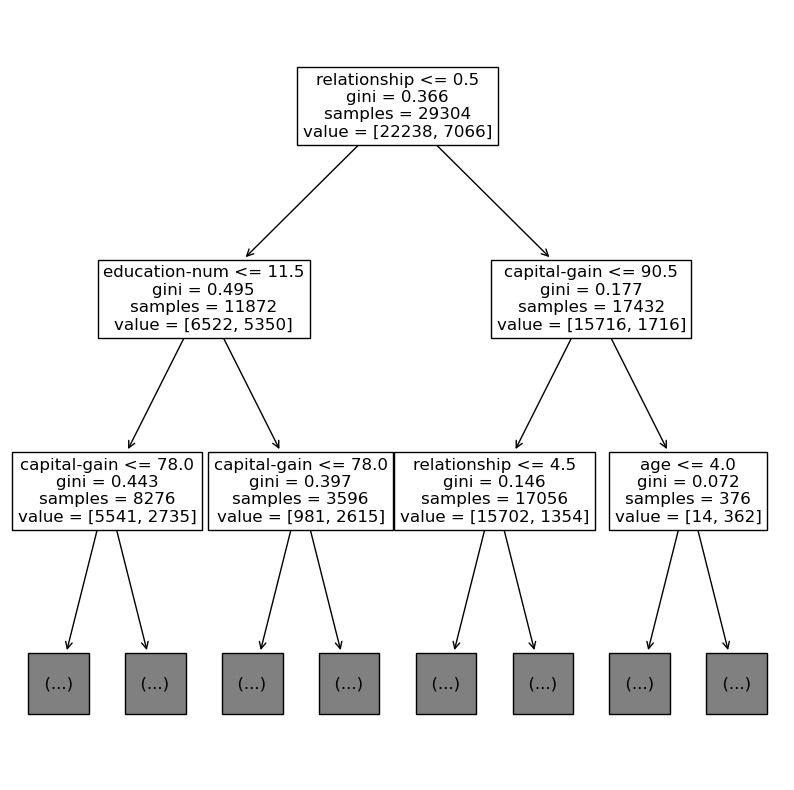

In [101]:
plt.figure(figsize=(10,10));
tree.plot_tree(model, feature_names=list(adult.columns),max_depth=2, fontsize=12)

### sklearn tree structure

The entire binary tree structure is represented as a number of parallel arrays. The i-th element of each array holds information about the node i. Node 0 is the tree’s root. Nunbers are assigned in a depth-first order.

Some of these are:

- children_left[i]: id of the left child of node i or -1 if leaf node

- children_right[i]: id of the right child of node i or -1 if leaf node

- feature[i]: feature used for splitting node i

- threshold[i]: threshold value at node i

- n_node_samples[i]: the number of training samples reaching node i

- impurity[i]: the impurity at node i

For more information:
[sklearn tree structure](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html)

### Feature importances from scratch

In [58]:
def my_feature_importance(tree, idx, imps, normalized = True):
    """
    :tree: Decision tree built
    :idx: Index of the root of the subtree that the importances will be calculated.
    :imps: feature importances, should be initialized to all zeros 
    :return: imps
    """
    if tree.children_left[idx] > -1:
        imps[tree.feature[idx]]+=(tree.n_node_samples[idx]*tree.impurity[idx] 
        - tree.n_node_samples[tree.children_left[idx]]*tree.impurity[tree.children_left[idx]]
        - tree.n_node_samples[tree.children_right[idx]]*tree.impurity[tree.children_right[idx]])

        my_feature_importance(tree, tree.children_left[idx], imps, normalized)
        my_feature_importance(tree, tree.children_right[idx], imps, normalized)
    
    if normalized:
        return imps/np.sum(imps)
    else:
        return imps

Now, let us check my_feature_importance finds the same importance values as sklearn

In [59]:
imps = np.zeros(model.n_features_in_)
imps = my_feature_importance(model.tree_,0, imps, normalized=True)
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals, "sklearn features":X.columns[sorted_idx], "sklearn values":sorted_vals}
pd.DataFrame(d)

,features,values,sklearn features,sklearn values
0,poutcome_success,0.612317,poutcome_success,0.612317
1,age,0.105805,age,0.105805
2,month_mar,0.075501,month_mar,0.075501
3,month_jun,0.069756,month_jun,0.069756
4,contact_unknown,0.068545,contact_unknown,0.068545
5,pdays,0.017040,pdays,0.017040
6,housing_yes,0.012875,housing_yes,0.012875
7,campaign,0.008731,campaign,0.008731
8,month_oct,0.005782,month_oct,0.005782
9,month_sep,0.004488,month_sep,0.004488


### Inconsistent results in XGBoost

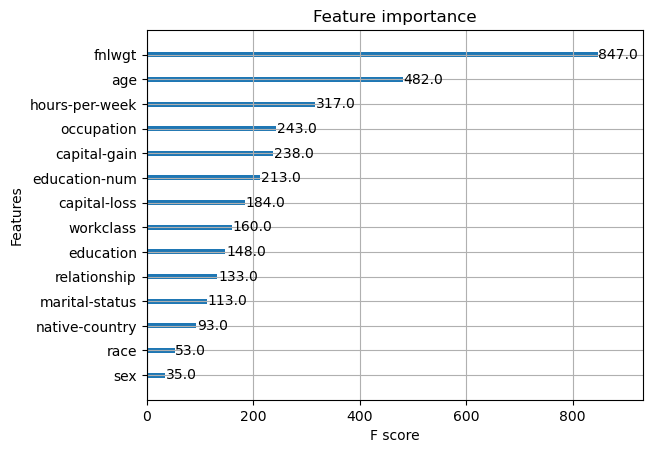

In [107]:
xgb_clf = xgboost.XGBClassifier().fit(X,y)
xgboost.plot_importance(xgb_clf, importance_type="weight");

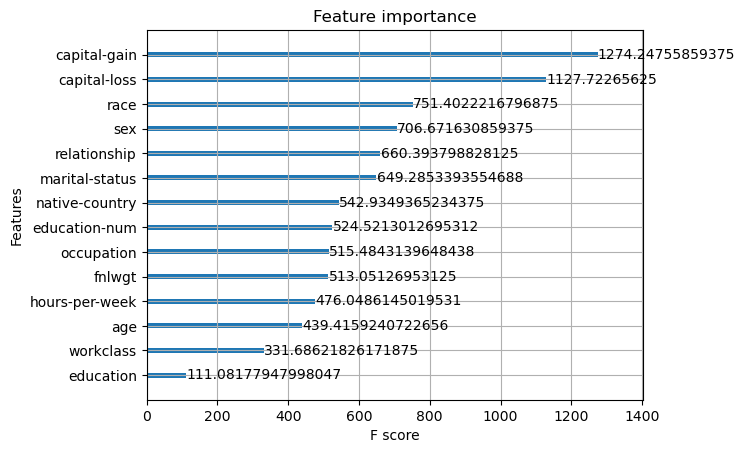

In [106]:
xgboost.plot_importance(xgb_clf, importance_type="cover");


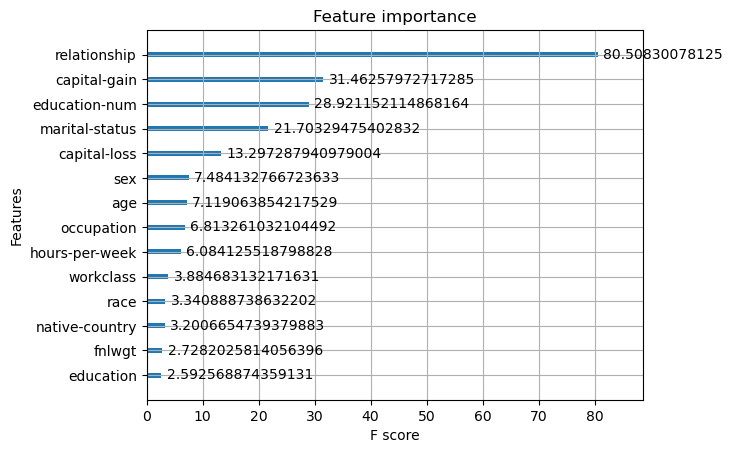

In [105]:
xgboost.plot_importance(xgb_clf, importance_type="gain");


### Random Feature

In [109]:
rng = np.random.RandomState(seed=42)
X["random_cat"] = rng.randint(3, size=X.shape[0])
X["random_num"] = rng.randn(X.shape[0])

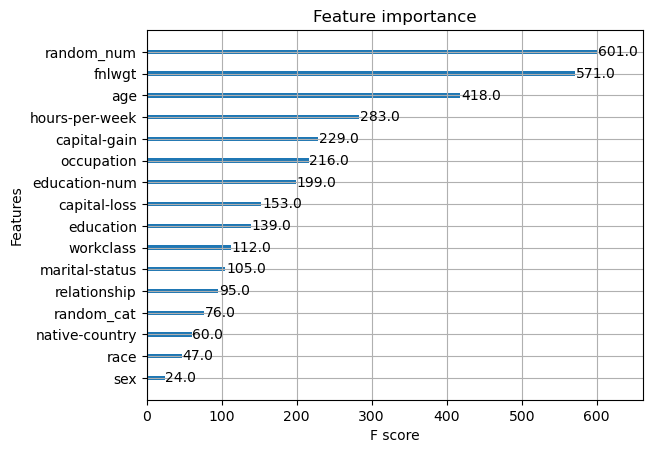

In [113]:
xgb_clf = xgboost.XGBClassifier().fit(X,y)
xgboost.plot_importance(xgb_clf, importance_type="weight");

In [116]:
model = RandomForestClassifier().fit(X,y)
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals}
pd.DataFrame(d)

,features,values
0,age,0.114860
1,capital-gain,0.113603
2,random_num,0.112228
3,fnlwgt,0.111547
4,relationship,0.096939
5,education-num,0.095469
6,marital-status,0.075046
7,hours-per-week,0.068458
8,occupation,0.054513
9,capital-loss,0.034977


In [120]:
model = DecisionTreeClassifier().fit(X,y)
imps = model.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals}
pd.DataFrame(d)

,features,values
0,relationship,0.197295
1,fnlwgt,0.127662
2,random_num,0.123925
3,education-num,0.114667
4,capital-gain,0.112988
5,age,0.089720
6,hours-per-week,0.060996
7,occupation,0.043729
8,capital-loss,0.036443
9,workclass,0.027919


Let us now look at house price prediction dataset

In [60]:
# Run Regression Tree with top correlated 10 attributes with SalePrice

train = pd.read_csv("../../datasets/house/train.csv")
#train = pd.read_csv("train.csv")
#test = pd.read_csv("../datasets/house_prices/test.csv")

cors = train.corr(numeric_only=True); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())
regr = DecisionTreeRegressor()
model = regr.fit(X_train, y_train)
test_predictions = model.predict(X_test)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))



Test MAE: 30971.794520547945


In [61]:
imps = regr.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

imps = np.zeros(regr.n_features_in_)
imps = my_feature_importance(regr.tree_,0, imps)
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals, "sklearn features":X.columns[sorted_idx], "sklearn values":sorted_vals}
pd.DataFrame(d)

,features,values,sklearn features,sklearn values
0,OverallQual,0.659411,OverallQual,0.659411
1,GrLivArea,0.136680,GrLivArea,0.136680
2,TotalBsmtSF,0.060375,TotalBsmtSF,0.060375
3,1stFlrSF,0.034152,1stFlrSF,0.034152
4,GarageCars,0.026024,GarageCars,0.026024
5,YearRemodAdd,0.024080,YearRemodAdd,0.024080
6,GarageArea,0.023317,GarageArea,0.023317
7,YearBuilt,0.021422,YearBuilt,0.021422
8,TotRmsAbvGrd,0.010262,TotRmsAbvGrd,0.010262
9,FullBath,0.004278,FullBath,0.004278


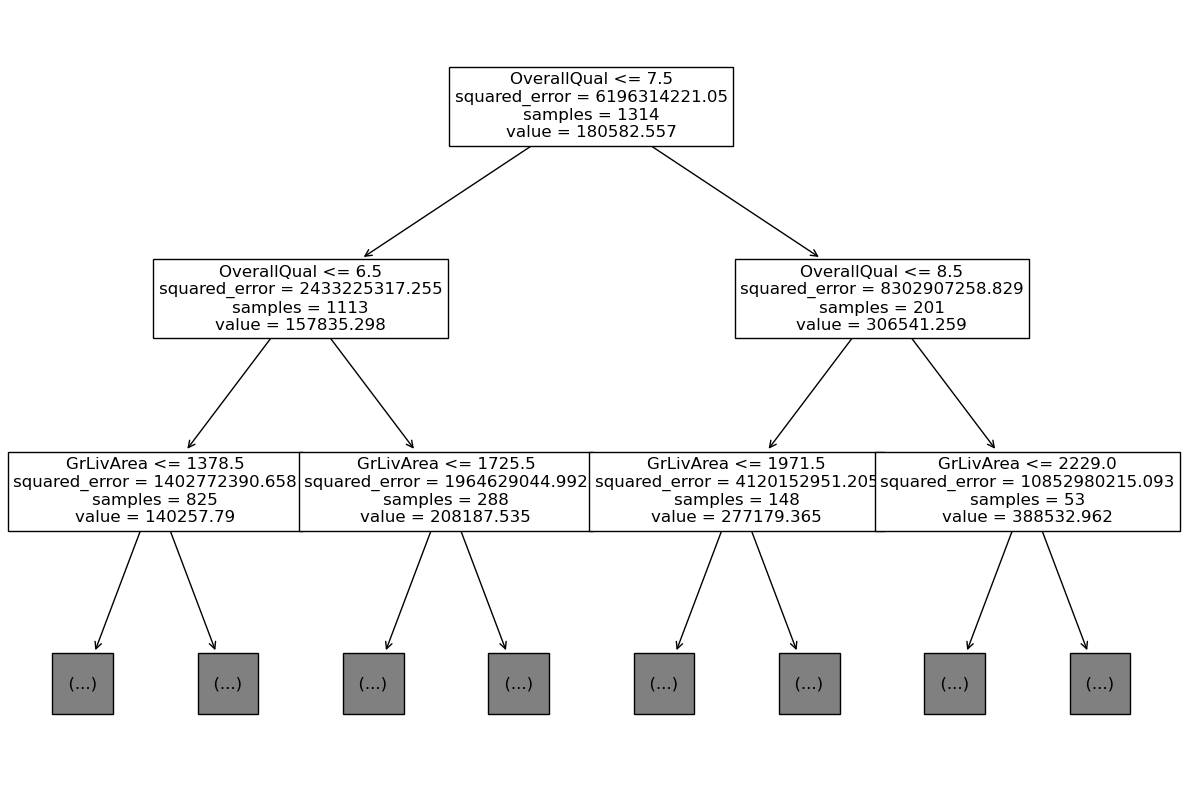

In [62]:
plt.figure(figsize=(15,10));
tree.plot_tree(regr, feature_names=list(X.columns),max_depth=2, fontsize=12);

### Discussion

- Feature importance scores are computed on the model which is fitted on the training set, therefore if a model overfits than the scores can be misleading. You can try to add a random feature to see this result.
- It is better to evaluate the importance of a feature on the test set. Permutation importance can help at this point.
- It is important not to forget that these scores only show the importance of a feature relative to a model. In other words how much a model relies on a feature. A feature which might not be used by a model does not mean that that feature is unimportant in general. This might happen, for example, when there are two important but correlated features. A decision tree will choose one of them and will not use the other one. This does not mean that the unused feature is not important in general.
- Permutation feature importance requires the true labels in addition to the model.
- Correlated features might create problems. Suppose that feature A is very important, if you add a correlated feature B, and then train a random forest, then some of the trees will use feature A and some of the trees will use feature B. As a result, the importance of these features will decrease.

### Permutation Importance

Permutation importance of a feature in the decrease in model score when the values of that feature are randomly shuffled.

In [14]:
X = bank_balanced.loc[:,'age':'poutcome']
X["random_num"] = np.random.rand(X.shape[0])
X.drop(columns=['duration'], inplace=True)

y = bank_balanced.loc[:,'y']
y = y.replace(["yes","no"],[1,0])
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
 
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

y_pred1 = clf.predict(X_test)  

print(classification_report(y_test,y_pred1))

NameError: name 'bank_balanced' is not defined

In [15]:
X.shape

(1460, 10)

In [16]:
perm_test = permutation_importance(clf, X_test, y_test)
perm_train = permutation_importance(clf, X_train, y_train)

NameError: name 'clf' is not defined

In [17]:
imps = clf.feature_importances_
sorted_idx = np.argsort(imps)[::-1]
sorted_vals = np.sort(imps)[::-1]

perm_imps_test = perm_test['importances_mean']
perm_sorted_idx_test = np.argsort(perm_imps_test)[::-1]
perm_sorted_vals_test = np.sort(perm_imps_test)[::-1]

perm_imps_train = perm_train['importances_mean']
perm_sorted_idx_train = np.argsort(perm_imps_train)[::-1]
perm_sorted_vals_train = np.sort(perm_imps_train)[::-1]

d = {"Perm. features Test":X.columns[perm_sorted_idx_test], "Perm. Imp. Test":perm_sorted_vals_test,"Perm. features Train":X.columns[perm_sorted_idx_train], "Perm. Imp.Train":perm_sorted_vals_train, "Feature Imp. features":X.columns[sorted_idx], "Feature Imp.":sorted_vals}
pd.DataFrame(d)

NameError: name 'clf' is not defined